In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 读取图片
img = Image.open('../../datasets/jmsd/perspective_v1/images/K1/camera_0/1750829021.587354_2.jpg').convert('RGB')

# 定义转换为tensor的transform
transform = transforms.ToTensor()

# 转化为tensor
img_tensor = transform(img)

In [3]:
import torch.nn.functional as F
def apply_sobel(image: torch.Tensor, direction: str='x'):
    if direction == 'x':
        kernel = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).to(image).unsqueeze(0).unsqueeze(0)
    elif direction == 'y':
        kernel = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).to(image).unsqueeze(0).unsqueeze(0)
    else:
        raise ValueError("Direction must be 'x' or 'y'.")
    if len(image.shape) == 3:
        image = image.unsqueeze(0)
    if image.shape[1] != 1:
        image = image.mean(dim=1, keepdim=True)
    return F.conv2d(image, kernel, padding=1)

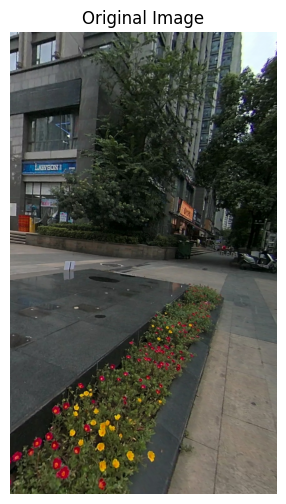

In [5]:
plt.figure(figsize=(12, 6))
plt.imshow(img_tensor.permute(1, 2, 0).numpy())
plt.axis('off')
plt.title('Original Image')
plt.show()

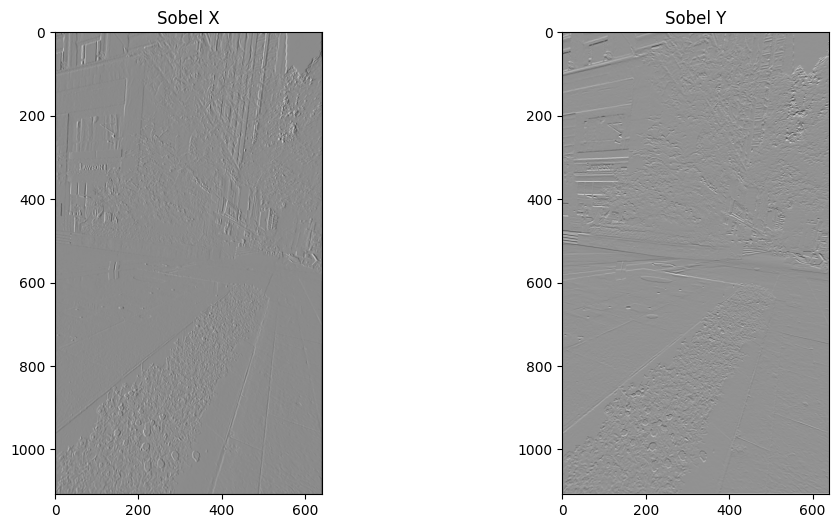

In [ ]:
result_x = apply_sobel(img_tensor, direction='x')
result_y = apply_sobel(img_tensor, direction='y')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Sobel X')
plt.imshow(result_x.squeeze().cpu().numpy(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Sobel Y')
plt.imshow(result_y.squeeze().cpu().numpy(), cmap='gray')
plt.show()